通过电商的数据，来分析用户的行为，从而更好的了解用户，做出新的运营决策

In [163]:
import pandas as pd 
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

In [169]:
df = pd.read_excel("/Users/xiaohanliu/Desktop/圈外数据课/电商.xlsx")
df.head()
#active: 1.不积极参与。 2.积极参与
# SEX: 1.男 2. 女 3. 未知

,user_id,avg_order,avg_money,active,sex
0,1,3.58,40.43,2,1
1,2,4.71,41.16,1,1
2,3,3.80,39.49,1,2
3,4,2.85,38.36,1,1
4,5,3.71,38.34,2,1


通过对活跃用户的分析，我们发现大约有一半的用户为非优惠活动活跃用户。活跃用户和非活跃用户的订单数量和平均每单价格差异并不是很大。 从性别方面来分析，三个性别类型的用户数量相差不大,男性用户的订单量和平均金额要低于女性用户和不愿意透露性别的用户。 但是男性用户参与优秀活动的活跃度相对来说更高一些。 

In [170]:
active_user_prop= df[df['active']==2].shape[0]/df.shape[0]
non_active_user_prop = df[df['active']==1].shape[0]/df.shape[0]
print("活跃用户比例为:{},不活跃用户比例为:{}".format(active_user_prop,non_active_user_prop))

活跃用户比例为:0.504,不活跃用户比例为:0.496


In [171]:
#不同性别用户数量分布
df_grouped = df.groupby('sex')['user_id'].count()/df.shape[0]
print(df_grouped)

sex
1    0.337
2    0.331
3    0.332
Name: user_id, dtype: float64


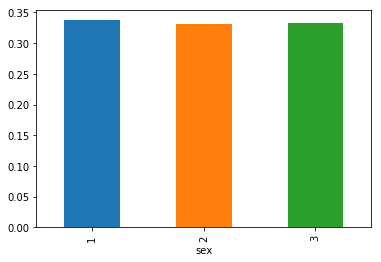

In [173]:
df_grouped= df_grouped.plot.bar()

In [174]:
df.groupby('sex')['active'].median()

sex
1    2
2    1
3    1
Name: active, dtype: int64

In [175]:
df.groupby('active')['avg_order','avg_money'].mean()

,avg_order,avg_money
active,,
1,3.341431,39.675988
2,3.309762,39.652222


In [176]:
df.groupby('sex')['avg_order','avg_money'].mean()

,avg_order,avg_money
sex,,
1,2.055994,38.999703
2,3.985015,39.020634
3,3.956506,40.979759


通过平均用户订单量和平均消费金额的散点图，我们可以吧用户行为分为三类： 
1. 高订单，高消费
2. 高订单，低消费
3. 低订单，低消费

总体来说，平均订单量在1-5之间，平均消费金额在38-42元之间。 

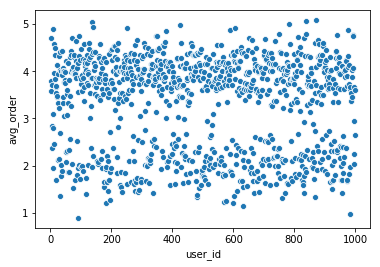

In [98]:
sns.scatterplot(x='user_id',y='avg_order',data=df)

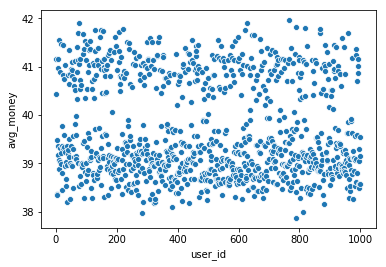

In [99]:
sns.scatterplot(x='user_id',y='avg_money',data=df)

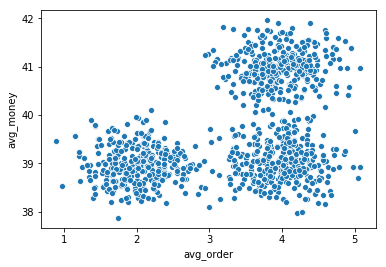

In [101]:
sns.scatterplot(x='avg_order',y='avg_money',data=df)

通过KMeans算法，我们通过用户行为把用户进行归类，来进一步分析每一类用户的特点. 
0: 高订单，高消费，不受优惠活动的影响，不愿意披露性别
1： 低订单，低消费，参与优惠活动相对积极，男女各半
2： 高订单，低消费，参与优惠活动相对不积极，男女各半

三类用户占比大致相同，0类型和2类型用户为我们的主要用户。 0类用户，可能更加注重产品的质量，而2类用户更加注重产品是否实惠。因为两类用户对优惠互动相对都不是很积极，建议减少优惠活动的次数，把节约下的成本用来提升产品质量，或降低部分产品的价格，来吸引用户。 


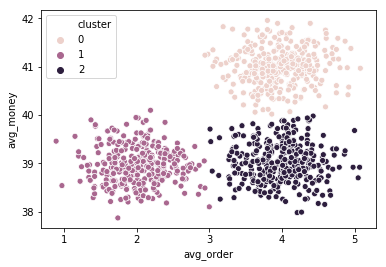

In [178]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df[['avg_order','avg_money']])
df['cluster']=kmeans.labels_
sns.scatterplot(x='avg_order',y='avg_money',hue='cluster',data=df)

In [137]:
sil_score = []
ch_score=[]
for i in range (2,5): 
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df[['avg_order','avg_money']])
    sil_score_new=  silhouette_score(df[['avg_order','avg_money']], kmeans.labels_)
    ch_score_new = calinski_harabaz_score(df[['avg_order','avg_money']], kmeans.labels_)
    sil_score.append(sil_score_new)
    ch_score.append(ch_score_new)
    print('聚类%d簇的calinski_harabaz分数为：%f'%(i,ch_score_new))

聚类2簇的calinski_harabaz分数为：1172.532404
聚类3簇的calinski_harabaz分数为：2860.083542
聚类4簇的calinski_harabaz分数为：2233.357240


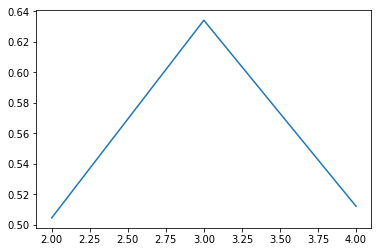

In [134]:
plt.plot(range(2,5), sil_score)

In [179]:
df.groupby('cluster').mean()

,user_id,avg_order,avg_money,active,sex
cluster,,,,,
0,466.105740,3.958610,40.996254,1.495468,2.975831
1,536.000000,2.022349,38.980602,1.512048,1.012048
2,499.308605,3.987389,39.028754,1.504451,2.000000


In [181]:
df.groupby('cluster')['user_id'].count()/df.shape[0]

cluster
0    0.331
1    0.332
2    0.337
Name: user_id, dtype: float64